In [ ]:
# TO_DO:
# punto 3, correlación
# Medida de normalidad
# Histograma para que quede lindo
# Permutaciones (punto 1, tal vez). Pregunta para la permutación

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [5]:
atletas = "/Users/lmatayoshi/Desktop/tp1-ciencia-datos/tiempos.txt"

In [48]:
dataset = np.loadtxt(atletas, skiprows = 1)

In [49]:
# Usamos 2 desvíos standard para eliminar outliers
dataset2 = np.array(dataset)
mean_sol = np.mean(dataset2[:, 1])
std_sol = np.std(dataset2[:, 1])
mean_nublado = np.mean(dataset2[:, 2])
std_nublado = np.std(dataset2[:, 2])
mean_lluvia = np.mean(dataset2[:, 3])
std_lluvia = np.std(dataset2[:, 3])

dataset_without_outliers = []
for row in dataset2:
    if (row[1] < 2*std_sol + mean_sol and row[2] < 2*std_nublado + mean_nublado and row[3] < 2 * std_lluvia + mean_lluvia):
        dataset_without_outliers.append(row)


In [56]:
sol = []
nublado = []
lluvia = []
for i in range (0,len(dataset_without_outliers)):
    sol.append(dataset_without_outliers[i][1])
    nublado.append(dataset_without_outliers[i][2])
    lluvia.append(dataset_without_outliers[i][3])

In [64]:
xs = np.array(dataset_without_outliers)[:, 0]

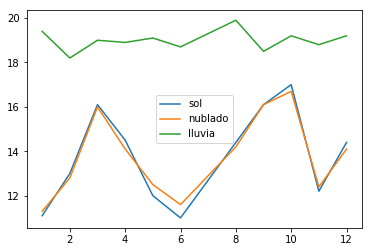

In [69]:
plt.plot(xs, sol, label="sol")
plt.plot(xs, nublado, label="nublado")
plt.plot(xs, lluvia, label="lluvia")
plt.legend()
plt.show()

In [36]:
# Usamos 2 desvíos standard para eliminar outliers

In [ ]:
# H_0: En días soleados, los atletas NO CORREN más rápido que en días lluviosos

In [68]:
sp.ttest_rel(sol,lluvia)

Ttest_relResult(statistic=-8.1659802299869533, pvalue=9.832130127750511e-06)

In [ ]:
# H_0: El clima nublado no influye en el tiempo de los atletas

In [70]:
sp.ttest_rel(sol, nublado)

Ttest_relResult(statistic=1.600386423731163e-15, pvalue=0.99999999999999878)

In [73]:
# H_0: La velocidad en días de lluvia es independiente del atleta. Ergo, el desvío standard
# de la distribución debería ser bajo

In [72]:
print np.std(lluvia)

0.435795084153


In [75]:
# Anova un factor,  con la condicion "Clima" como factor de 3 niveles
# H_0: No hay diferencia en la distribucion de los diferentes niveles de condicion clima
# ergo: los grupos presentan las mismas velocidades sin importar la condicion climàtica
anova_clima = sp.f_oneway(sol,nublado,lluvia)
print anova_clima

F_onewayResult(statistic=36.907516413855539, pvalue=8.1830487111034126e-09)
